<a href="https://colab.research.google.com/github/chinmaykulkarni19/Quality-Wine-Prediction/blob/main/prediction_of_quality_of_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*In this notebook, First I have done some exploration on the data using matplotlib and seaborn.
Then, I use different classifier models to predict the quality of the wine.*

**1. Random Forest Classifier**

**2. Support Vector Classifier(SVC) **

*Then I use cross validation evaluation technique to optimize the model performance.*

**1. Grid Search CV**

**2. Cross Validation Score**


In [ ]:
#Importing required packages.
import pandas as pd
import seaborn as sns   #statistical visualizations, such as heatmaps, distribution plots, and regression plots.
import matplotlib.pyplot as plt #for creating static, interactive, and animated visualizations in Python
import io
from sklearn.ensemble import RandomForestClassifier   # It provides a wide range of tools for various tasks such as classification, regression, clustering, model selection, and data preprocessing
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
#Loading dataset
wine = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))
print(wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## **Let's do some plotting to know how the data columns are distributed in the dataset**

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

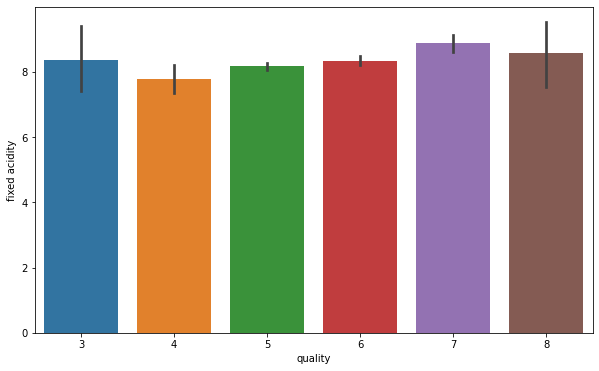

In [ ]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))    #figsize is a tuple of the width and height of the figure in inches
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

In [ ]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

In [ ]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

In [ ]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

In [ ]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

In [ ]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

In [ ]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

## Preprocessing Data for performing Machine learning algorithms

In [ ]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [ ]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()    #LabelEncoder is not an algorithm of machine learning, but rather a data preprocessing technique that is commonly used in machine learning workflows.
#LabelEncoder is a function from the scikit-learn library in Python that converts categorical variables (i.e., variables that take on a limited set of values) into numeric labels. This is often necessary because many machine learning algorithms require numeric inputs, and cannot handle categorical variables directly.
#For example, suppose we have a dataset of wine reviews, and one of the variables is "variety", which takes on values like "Chardonnay", "Pinot Noir", "Cabernet Sauvignon", and so on. We could use LabelEncoder to convert these values into numeric labels, like 0, 1, 2, etc.

In [ ]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [ ]:
wine['quality'].value_counts()

In [ ]:
sns.countplot(wine['quality'])

In [ ]:
#Now seperate the dataset as response variable(dependent variable or target variable) and feature variabes( independent variables, input variables )
X = wine.drop('quality', axis = 1)    # the response variable is the variable being predicted or modeled, while the feature variables are the input variables used to make the prediction or model.
y = wine['quality'] 

In [ ]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#X_train  It typically consists of a set of input features (i.e., independent variables) that are used to predict the output variable (i.e., dependent variable).
# X_test  It also consists of input features, but it is used to make predictions and compare them with the actual output values.
# y_train This is the output variable (i.e., dependent variable) for the training dataset. It contains the actual values
# y_test This is the output variable (i.e., dependent variable) for the testing dataset.

the purpose of StandardScaler is to transform the features of a dataset so that they have a standard scale and distribution. This is important because some machine learning algorithms may be sensitive to the scale and distribution of the input features. By scaling the features to have the same range and distribution, we can help the machine learning algorithm to better understand the relative importance of each feature and make better predictions. In other words, the StandardScaler ensures that all features are weighted equally during the training process, which can improve the accuracy and reliability of the machine learning model.

In [ ]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

#The StandardScaler is a preprocessing technique used to scale the input features to a standard range of values. 
#It transforms the input features by subtracting the mean and dividing by the standard deviation, so that the scaled features have zero mean and unit variance.

#  When using machine learning algorithms, it is important to scale the features to a similar range to prevent the algorithm from overemphasizing some features over others.

In [ ]:
# To use the StandardScaler in the wine quality prediction project, we can first split the dataset into X_train and X_test subsets as described in the previous answer. 
# Then, we can apply the StandardScaler on the training set and use the same scaler to transform the testing set. This ensures that both the training and testing sets are scaled in the same way.

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Our training and testing data is ready now to perform machine learning algorithm

### Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200) # These hyperparameters control the number of trees in the forest
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

The fit method trains the Random Forest model on the training data by building a forest of decision trees and optimizing the splits of the trees to minimize the mean squared error between the predicted quality scores and the actual quality scores. 

In [ ]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

Precision = True Positives / (True Positives + False Positives)

Recall = True Positives / (True Positives + False Negatives)

F1-score = 2 * (Precision * Recall) / (Precision + Recall)

#### Random forest gives the accuracy of 87%

In [ ]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

True Positive (TP): The number of correctly predicted positive instances.

False Positive (FP): The number of incorrectly predicted positive instances.

True Negative (TN): The number of correctly predicted negative instances.

False Negative (FN): The number of incorrectly predicted negative instances

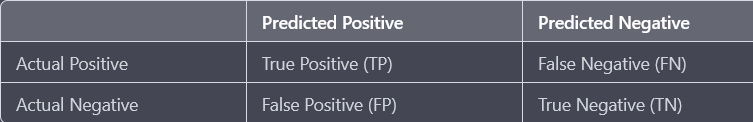

## Support Vector Classifier

During the training phase, the SVM algorithm finds the hyperplane that best separates the training data into their respective classes. The hyperplane is determined by finding the maximum margin between the training data points and the decision boundary. The margin is the distance between the hyperplane and the nearest data points from each class.

Once the hyperplane has been identified, the SVM algorithm can use it to predict the class of new, unseen data points. The algorithm computes the distance between the new data point and the hyperplane, and based on the side of the hyperplane that the data point falls on, it is classified as belonging to one of the classes.

Support Vector Classifier (SVC) is a variant of SVM used for classification tasks. It works by finding the optimal hyperplane that separates the data points belonging to different classes, while maximizing the margin.

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_svc))

#### Support vector classifier gets 86%

## Let's try to increase our accuracy of models
## Grid Search CV

Grid Search CV is a technique used in machine learning to tune hyperparameters of a model by searching over a range of values for each hyperparameter and finding the combination that yields the best performance.

Grid Search CV is often used in conjunction with Support Vector Machines (SVMs) to find the best hyperparameters for the SVM model.

In [ ]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

C, kernel, and gamma are hyperparameters of the Support Vector Machine (SVM) model that we are trying to optimize using GridSearchCV.

In [ ]:
grid_svc.fit(X_train, y_train)

In [ ]:
#Best parameters for our svc model
grid_svc.best_params_

In [ ]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

### SVC improves from 86% to 90% using Grid Search CV

## Cross Validation Score for random forest

Cross-validation is a useful technique for evaluating the performance of Random Forest models. Random Forest is an ensemble learning algorithm that combines multiple decision trees to make predictions.

In the case of Random Forest, cross-validation can be used to tune hyperparameters such as the number of trees in the forest, the maximum depth of the trees, and the number of features to consider when splitting a node. Cross-validation can also be used to evaluate the performance of the model on new, unseen data.

In [ ]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

### Random forest accuracy increases from 87% to 91 % using cross validation score